In [170]:
import time
import requests as r
import pandas as pd
import matplotlib.pyplot as plt # this is for faceting
import gc
plt.rcParams['figure.figsize'] = [10, 6]

# set constants
CHECKPOINT = 1597438094  # Aug 14 2020
AFTER = 1344977321 # Aug 14 2012
# define helper functions
def rightnow():
    return int(time.time())
from datetime import datetime

In [115]:
# could also search selftext, or filter on numebr of upvotes or something

In [176]:
# set params for requests
params = {
    'title': 'paleo',
    'before': CHECKPOINT,
    'after': AFTER,
    'subreddit':['nutrition', 'HealthyFood', 'daddit', 'parenting', 'BabyFood'],
    'limit': 100
}

url = f'https://api.pushshift.io/reddit/search/submission/'
agg = []

In [177]:
while True:
    attempt = 0
    # attempt to fetch data at the url endpoint, if fail, print error and bail on task
    try:
        response = r.get(url, params)
        response.raise_for_status()
        payload = response.json()
    except requests.exceptions.RequestException as e:
        print(e)
        break
    data = payload['data']
    print(f"{params['before']} found {len(data)} submissions")
    # if there is no more data, write the current state of agg to local
    if not data:
          outframe = pd.concat(agg)
          outframe.to_csv(f"{params['subreddit']}-{params['title']}.csv")
          break
    # assuming there is more data, pack data into frame and append to collection (agg)
    df = pd.DataFrame(data)
    agg.append(df)
    # sometimes you might be collecting 1000's of submissions
    # this takes up a lot of memory, we can manage the memory by splitting the load
    # if the number of frames is over the allowed limit (can be changed) write the current state to local and reset agg (i.e clear the memory so we don't overflow)
    if len(agg) >= 1000:
        attempt += 1
        print(f"checkpointing at {params['before']}")
        outframe = pd.concat(agg)
        outframe.to_csv(f'{params["subreddit"]-params["title"]}-{attempt}.csv')
        agg = []  # reset agg
    # get the minimum timestamp, this is the 'furthest known' timestamp that tells the api what time we want to collect from
    params['after'] = df['created_utc'].max()
    # sleep so we don't overload the api and get a 403 error
    time.sleep(0.2)

1597438094 found 100 submissions
1597438094 found 100 submissions
1597438094 found 88 submissions
1597438094 found 0 submissions


/Users/joehovde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [178]:
df = pd.read_csv(f"{params['subreddit']}-{params['title']}.csv")

In [179]:
df['month']=pd.to_datetime(df['created_utc'],unit='s').dt.to_period('M')

In [180]:
df['year']=pd.to_datetime(df['created_utc'],unit='s').dt.year

In [181]:
#keto starts growing 2017

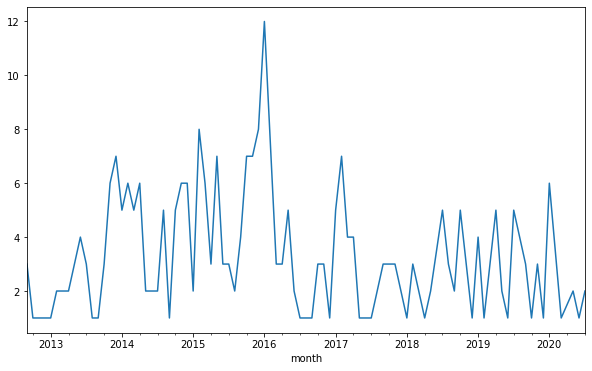

In [182]:
(df.groupby('month').count()['created_utc']).plot()

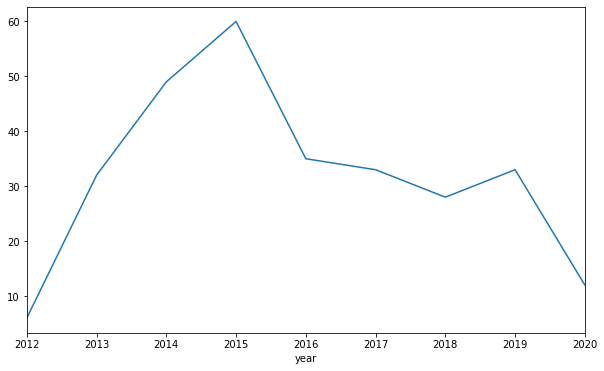

In [183]:
(df.groupby('year').count()['created_utc']).plot()

In [184]:
df['subreddit'].value_counts()

HealthyFood    159
nutrition      127
daddit           2
Name: subreddit, dtype: int64

In [185]:
df.loc[df['subreddit']=='BabyFood'].groupby('year').count()['created_utc']

Series([], Name: created_utc, dtype: int64)

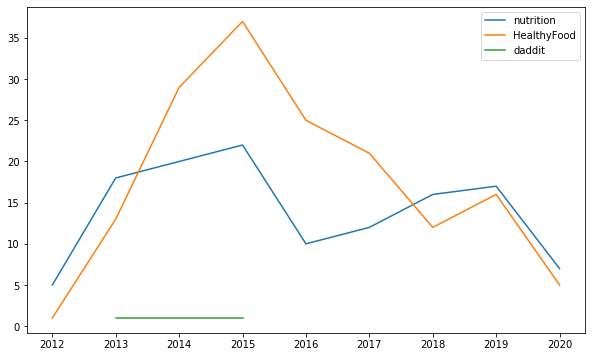

In [186]:
for sub in df['subreddit'].drop_duplicates():
    plot_df=df.loc[df['subreddit']==sub]
    plt.plot(plot_df.groupby('year').count()['created_utc'], label=sub)
    plt.legend()

In [172]:
for sub in df['subreddit'].drop_duplicates():
    plot_df=df.loc[df['subreddit']==sub]
    plt.plot(plot_df.groupby('month').count()['created_utc'], label=sub)
    plt.legend()

TypeError: Axis must have `freq` set to convert to Periods

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11dc56598> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [143]:
df[['og_description', 'selftext', 'subreddit']]

,og_description,selftext,subreddit
0,NaN,Nutrition has always been confusing for me. Th...,nutrition
1,NaN,Spoiler: You are not\n\nThis series of posts g...,nutrition
2,NaN,"Hi there everybody!\n\nI'm 5'3"", 120 lbs, fema...",nutrition
3,NaN,[So this is happening...](http://imgur.com/Qex...,nutrition
4,NaN,Hi everyone!!! i posted this on r/health too....,nutrition
5,NaN,Is it even normal?? Few days ago i was eating ...,nutrition
6,NaN,"I can tell carbs are bad, but what is the actu...",nutrition
7,NaN,NaN,nutrition
8,NaN,I have been on keto for a good few months and ...,nutrition
9,NaN,http://www.cbssports.com/nba/writer/ken-berger...,nutrition
